# Import necessary libraries



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

# Import file upload functionality from Google Colab

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving kc_house_data.csv to kc_house_data (2).csv


# Load the dataset into a Pandas DataFrame

In [ ]:
df = pd.read_csv("kc_house_data.csv")
df.head(10)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [ ]:
df.dtypes

,0
id,int64
date,object
price,float64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64


# Check for missing values and display the shape of the DataFrame

In [ ]:
print(df.isnull().sum())
df.shape


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


(21613, 21)

# General Information of the Dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Display descriptive statistics of the DataFrame

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00



# Feature Engineering: Create new features


In [ ]:

# Calculate total area by adding sqft_living and sqft_lot

df['total_area'] = df['sqft_living'] + df['sqft_lot']

# Calculate property age based on the current year and year built

current_year = datetime.now().year
df['property_age'] = current_year - df['yr_built']

# Calculate price per square foot

df['price_per_sqft'] = df['price'] / df['sqft_living']

# Convert the 'date' column to datetime format

df['date'] = pd.to_datetime(df['date'])


df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'total_area',
       'property_age', 'price_per_sqft'],
      dtype='object')

# Correlation Analysis

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Display correlation between price and other features
print(correlation_matrix['price'].sort_values(ascending=False))

price             1.000000
sqft_living       0.702035
grade             0.667434
sqft_above        0.605567
sqft_living15     0.585379
price_per_sqft    0.554703
bathrooms         0.525138
view              0.397293
sqft_basement     0.323816
bedrooms          0.308350
lat               0.307003
waterfront        0.266369
floors            0.256794
yr_renovated      0.126434
total_area        0.104801
sqft_lot          0.089661
sqft_lot15        0.082447
yr_built          0.054012
condition         0.036362
long              0.021626
date             -0.004357
id               -0.016762
zipcode          -0.053203
property_age     -0.054012
Name: price, dtype: float64


# Visualize the correlation matrix using a heatmap

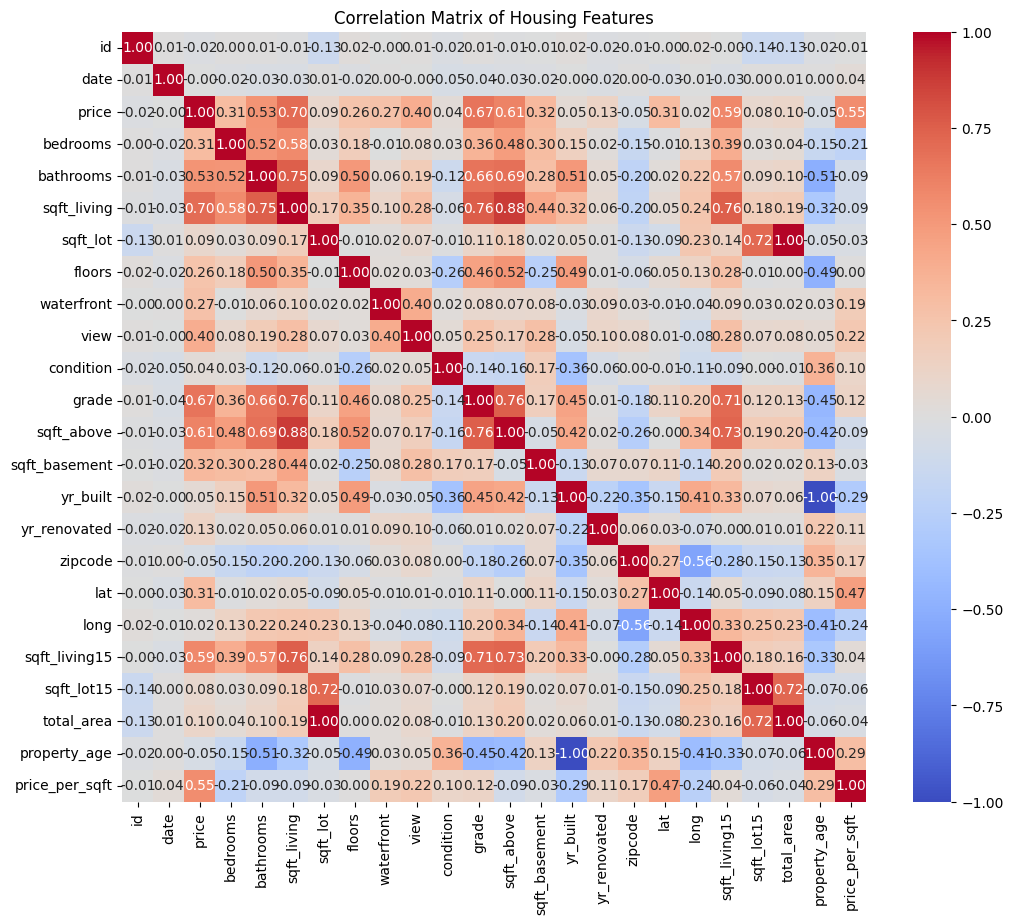

In [ ]:
# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Housing Features')
plt.show()

# Data Visualization


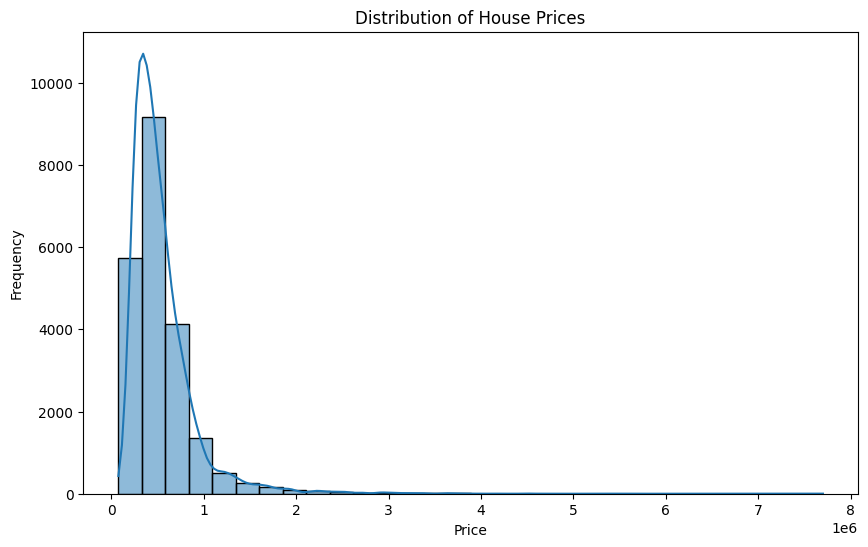

In [ ]:
# Histogram of house price

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

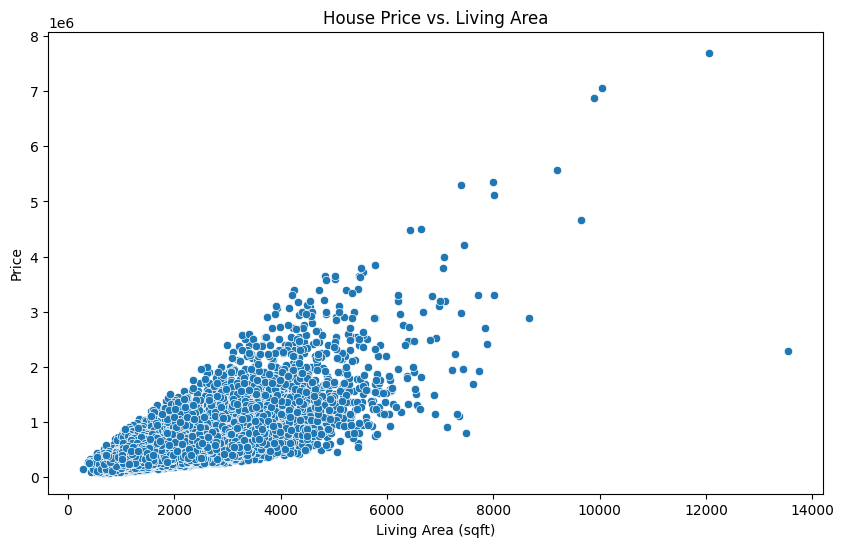

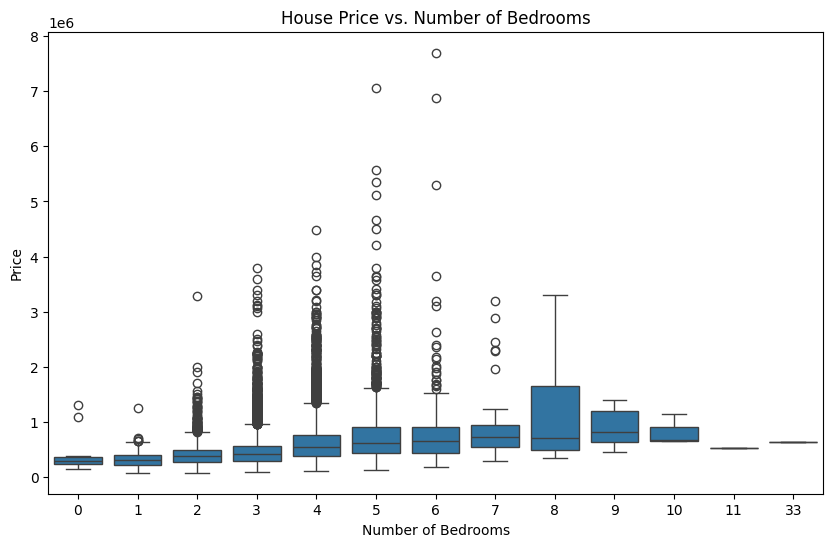

In [ ]:
# Scatter plot for area vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('House Price vs. Living Area')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.show()

# Box plot for number of bedrooms vs. price
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('House Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

# Time trend of house prices

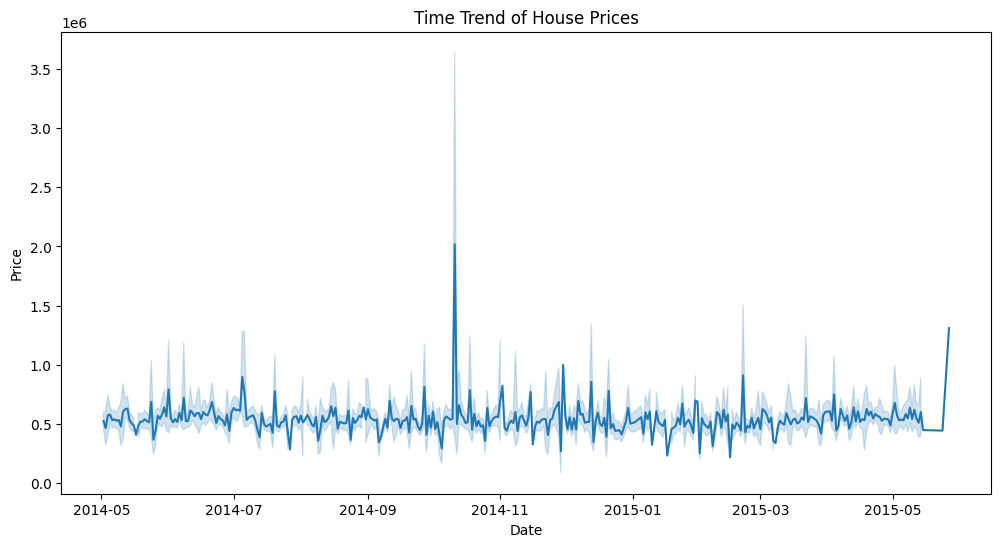

In [ ]:
df['date'] = pd.to_datetime(df['date'])  # Ensure 'date' is in datetime format
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='price', data=df)
plt.title('Time Trend of House Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


# Pair plot for selected features

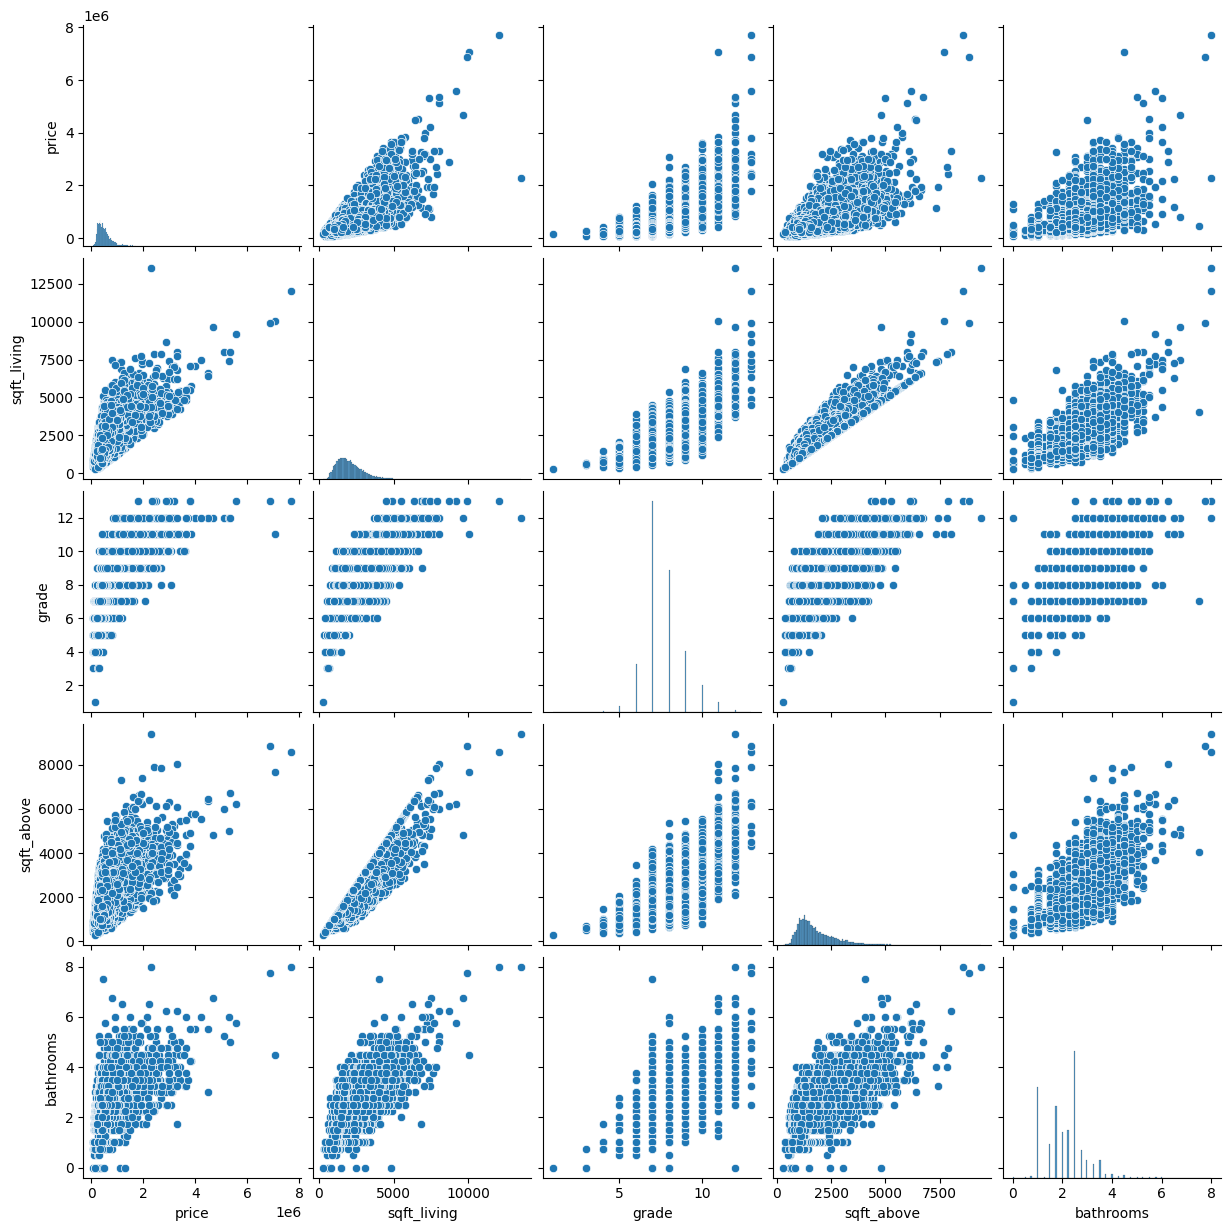

In [ ]:
sns.pairplot(df[['price', 'sqft_living', 'grade', 'sqft_above', 'bathrooms']])
plt.show()

# Geographic Visualization: Mapping House Locations

In [ ]:

import folium

# Create a folium map centered on the average latitude and longitude
map_center = [df['lat'].mean(), df['long'].mean()]
house_map = folium.Map(location=map_center, zoom_start=10)

# Add markers for each house with price as a tooltip
for index, row in df[df['price'] < 2e6].iterrows():  # Filter prices below 2 million
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=5,
        color='red',  #
        fill=True,
        fill_color='red',
        fill_opacity=0.2,
        tooltip=f"Price: ${row['price']:,.0f}"  # Format price with commas and no decimals
    ).add_to(house_map)

# Display the map
house_map

Output hidden; open in https://colab.research.google.com to view.

# Geographic Visualization: Mapping House Locations

In [ ]:
import folium

# Create a map centered on the average latitude and longitude
map_center = [df['lat'].mean(), df['long'].mean()]
house_map = folium.Map(location=map_center, zoom_start=10)

# Define color map for price per sqft
color_map = folium.LinearColormap(
    colors=['blue', 'green', 'yellow', 'orange', 'red'],
    vmin=df['price_per_sqft'].min(),
    vmax=df['price_per_sqft'].max(),
    caption='Price per Sqft'
)

# Add markers for each house with price per sqft as color
for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=5,  # Adjust marker size
        color=color_map(row['price_per_sqft']),  # Set color based on price per sqft
        fill=True,
        fill_color=color_map(row['price_per_sqft']),
        fill_opacity=0.7,
        tooltip=f"Price per Sqft: ${row['price_per_sqft']:.2f}"  # Format price with 2 decimals
    ).add_to(house_map)

# Add color bar to the map
color_map.add_to(house_map)

# Display the map
house_map

Output hidden; open in https://colab.research.google.com to view.

# Data Preprocessing: Winsorizing Price

In [ ]:
from scipy.stats.mstats import winsorize

# Winsorize 'price' at the 5th and 95th percentiles
df['price_winsorized'] = winsorize(df['price'], limits=[0.05, 0.05])

# Correlation Analysis with Winsorized Price

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Display correlation between price and other features
print(correlation_matrix['price_winsorized'].sort_values(ascending=False))

price_winsorized    1.000000
price               0.878714
grade               0.704555
sqft_living         0.695581
sqft_living15       0.629557
sqft_above          0.607010
price_per_sqft      0.552982
bathrooms           0.532515
lat                 0.396384
view                0.360505
bedrooms            0.336080
sqft_basement       0.307723
floors              0.295635
waterfront          0.159936
yr_renovated        0.123337
total_area          0.116291
sqft_lot            0.101341
sqft_lot15          0.092332
yr_built            0.060372
long                0.043574
condition           0.040288
date               -0.007971
id                 -0.012831
zipcode            -0.042916
property_age       -0.060372
Name: price_winsorized, dtype: float64


In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Filter for correlations above a threshold (e.g., 0.8)
highly_correlated = correlation_matrix[correlation_matrix > 0.8]

# Display highly correlated features
print(highly_correlated)

                   id  date     price  bedrooms  bathrooms  sqft_living  \
id                1.0   NaN       NaN       NaN        NaN          NaN   
date              NaN   1.0       NaN       NaN        NaN          NaN   
price             NaN   NaN  1.000000       NaN        NaN          NaN   
bedrooms          NaN   NaN       NaN       1.0        NaN          NaN   
bathrooms         NaN   NaN       NaN       NaN        1.0          NaN   
sqft_living       NaN   NaN       NaN       NaN        NaN     1.000000   
sqft_lot          NaN   NaN       NaN       NaN        NaN          NaN   
floors            NaN   NaN       NaN       NaN        NaN          NaN   
waterfront        NaN   NaN       NaN       NaN        NaN          NaN   
view              NaN   NaN       NaN       NaN        NaN          NaN   
condition         NaN   NaN       NaN       NaN        NaN          NaN   
grade             NaN   NaN       NaN       NaN        NaN          NaN   
sqft_above        NaN   N


# Feature Selection: Dropping Irrelevant Features

In [ ]:
# Drop irrelevant features (carefully consider 'long' and 'property_age')
drop_cols = ['id', 'date', 'total_area','property_age', 'sqft_above', 'yr_built','zipcode','sqft_lot','lat','long']
df.drop(columns=drop_cols, inplace=True)

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Display correlation between price and other features
print(correlation_matrix['price_winsorized'].sort_values(ascending=False))

price_winsorized    1.000000
price               0.878714
grade               0.704555
sqft_living         0.695581
sqft_living15       0.629557
price_per_sqft      0.552982
bathrooms           0.532515
view                0.360505
bedrooms            0.336080
sqft_basement       0.307723
floors              0.295635
waterfront          0.159936
yr_renovated        0.123337
sqft_lot15          0.092332
condition           0.040288
Name: price_winsorized, dtype: float64


# Model Training and Evaluation: Linear Regression


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Define features (X) and target variables (y)
X = df.drop(columns=['price', 'price_winsorized']) # Features: All columns except 'price' and 'price_winsorized'
y_original = df['price']  # Target variable: Original price
y_winsorized = df['price_winsorized']# Target variable: Winsorized price

# Split data into training and testing sets
# For original price
X_train, X_test, y_train, y_test = train_test_split(X, y_original, test_size=0.2, random_state=42)

# For winsorized price
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X, y_winsorized, test_size=0.2, random_state=42)

# Initialize and train Linear Regression models
model_original = LinearRegression()
model_winsorized = LinearRegression()

model_original.fit(X_train, y_train)
model_winsorized.fit(X_train_w, y_train_w)

# Make predictions
y_pred_original = model_original.predict(X_test)
y_pred_winsorized = model_winsorized.predict(X_test_w)

# Evaluate models using a function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📊 Model: {model_name}")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")

    # Calculate RMSE manually
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"RMSE: {rmse:.2f}")

evaluate_model(y_test, y_pred_original, "Orginal Price model")
evaluate_model(y_test_w, y_pred_winsorized, "Winsorized price model")



📊 Model: Original Price Model
R² Score: 0.8833
MAE: 71019.08
RMSE: 132799.29

📊 Model: Winsorized Price Model
R² Score: 0.8671
MAE: 57759.84
RMSE: 92937.23


#visualize the predictions of the original and winsorized Linear Regression models.

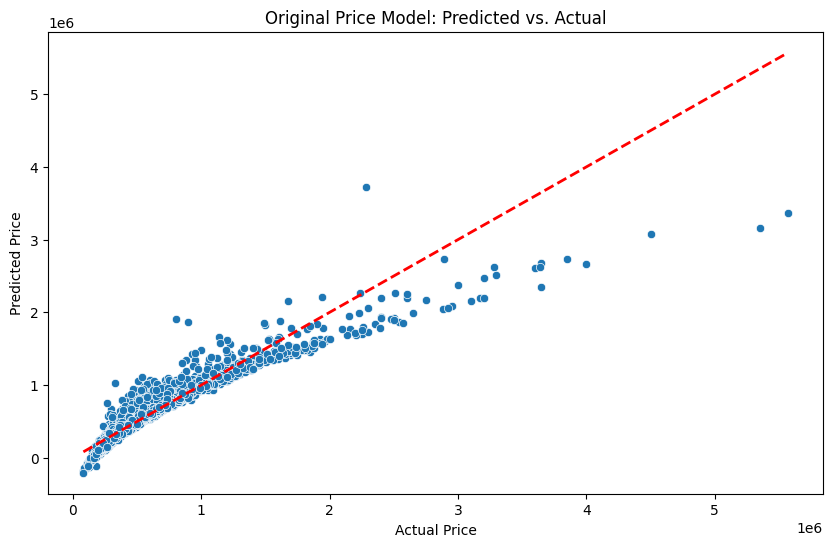

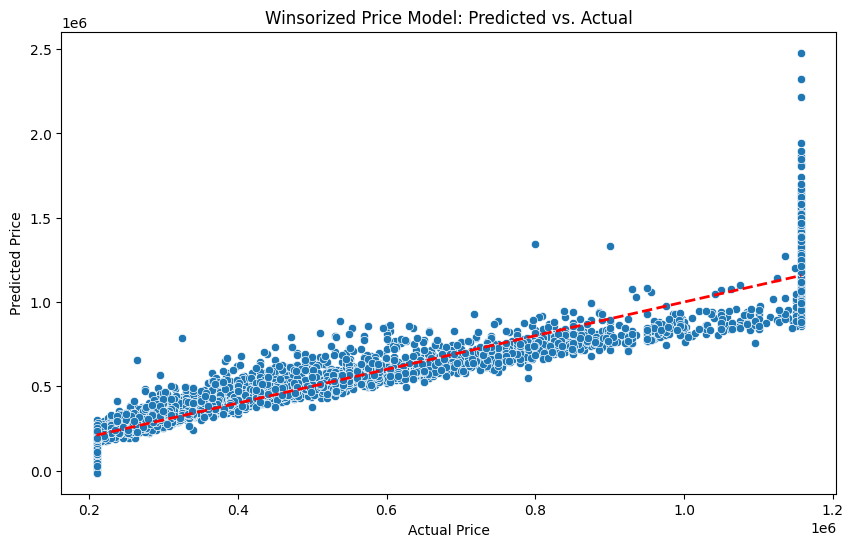

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Original Price Model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_original)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Add a diagonal line
plt.title('Original Price Model: Predicted vs. Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# Scatter plot for Winsorized Price Model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_w, y=y_pred_winsorized)
plt.plot([y_test_w.min(), y_test_w.max()], [y_test_w.min(), y_test_w.max()], 'r--', lw=2)  # Add a diagonal line
plt.title('Winsorized Price Model: Predicted vs. Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# Model Training and Evaluation: XGBoost

In [ ]:
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
# Parameters:
#   n_estimators: Number of boosting rounds (trees)
#   learning_rate: Step size shrinkage used in update to prevent overfitting
#   max_depth: Maximum depth of each tree
#   random_state: Seed for reproducibility


# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"📊 XGBoost Model\nR² Score: {r2_xgb:.4f}\nMAE: {mae_xgb:.2f}\nRMSE: {rmse_xgb:.2f}")


📊 XGBoost Model
R² Score: 0.9906
MAE: 10470.06
RMSE: 37786.89


# Model Training and Evaluation: XGBoost (Winsorized)

In [ ]:

# Initialize the XGBoost model
xgb_model_winsorized = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42)

# Train the model using winsorized price
xgb_model_winsorized.fit(X_train_w, y_train_w)

# Make predictions
y_pred_xgb_winsorized = xgb_model_winsorized.predict(X_test_w)

# Evaluate the model
r2_xgb_winsorized = r2_score(y_test_w, y_pred_xgb_winsorized)
mae_xgb_winsorized = mean_absolute_error(y_test_w, y_pred_xgb_winsorized)
rmse_xgb_winsorized = np.sqrt(mean_squared_error(y_test_w, y_pred_xgb_winsorized))

print(f"📊 XGBoost Model (Winsorized)\nR² Score: {r2_xgb_winsorized:.4f}\nMAE: {mae_xgb_winsorized:.2f}\nRMSE: {rmse_xgb_winsorized:.2f}")

📊 XGBoost Model (Winsorized)
R² Score: 0.9976
MAE: 7760.38
RMSE: 12442.22


# XGBoost Performance Comparison: Train vs. Test

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# Predict on train and test data
y_train_pred = xgb_model.predict(X_train)  # Replace xgb_model with your model variable
y_test_pred = xgb_model.predict(X_test)   # Replace xgb_model with your model variable

# Compute Train Scores
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Compute Test Scores
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"📊 XGBoost Performance Comparison")  # Changed title
print(f"✅ Train R²: {r2_train:.4f}, MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}")
print(f"✅ Test  R²: {r2_test:.4f}, MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}")

📊 XGBoost Performance Comparison
✅ Train R²: 0.9988, MAE: 7854.37, RMSE: 12438.88
✅ Test  R²: 0.9906, MAE: 10470.06, RMSE: 37786.89


# XGBoost (Winsorized) Performance Comparison: Train vs. Test

In [ ]:
# Predict on train and test data
y_train_pred = xgb_model_winsorized.predict(X_train_w)  # Using winsorized data
y_test_pred = xgb_model_winsorized.predict(X_test_w)   # Using winsorized data

# Compute Train Scores
r2_train = r2_score(y_train_w, y_train_pred)  # Using winsorized target
mae_train = mean_absolute_error(y_train_w, y_train_pred)  # Using winsorized target
rmse_train = np.sqrt(mean_squared_error(y_train_w, y_train_pred))  # Using winsorized target

# Compute Test Scores
r2_test = r2_score(y_test_w, y_test_pred)  # Using winsorized target
mae_test = mean_absolute_error(y_test_w, y_test_pred)  # Using winsorized target
rmse_test = np.sqrt(mean_squared_error(y_test_w, y_test_pred))  # Using winsorized target

print(f"📊 XGBoost (Winsorized) Performance Comparison")  # Changed title
print(f"✅ Train R²: {r2_train:.4f}, MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}")
print(f"✅ Test  R²: {r2_test:.4f}, MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}")

📊 XGBoost (Winsorized) Performance Comparison
✅ Train R²: 0.9985, MAE: 6560.53, RMSE: 9547.85
✅ Test  R²: 0.9976, MAE: 7760.38, RMSE: 12442.22


# Visualizing XGBoost Model Predictions: Scatter Plots

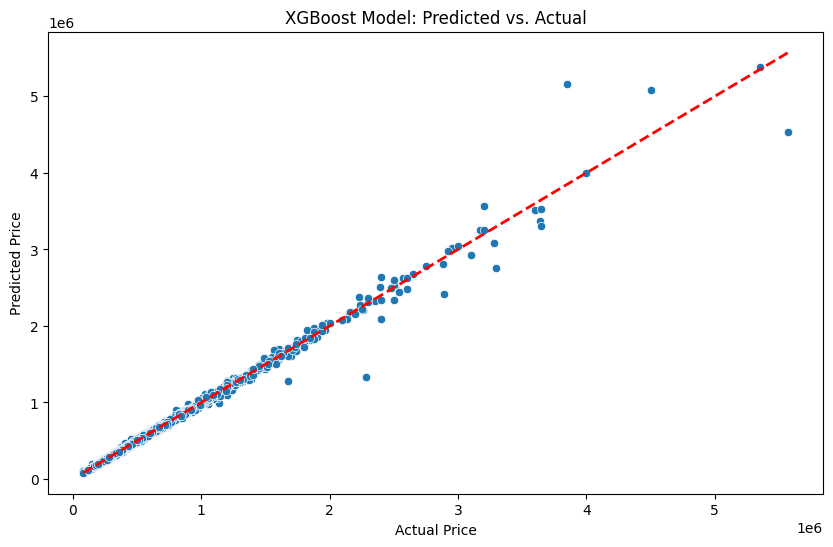

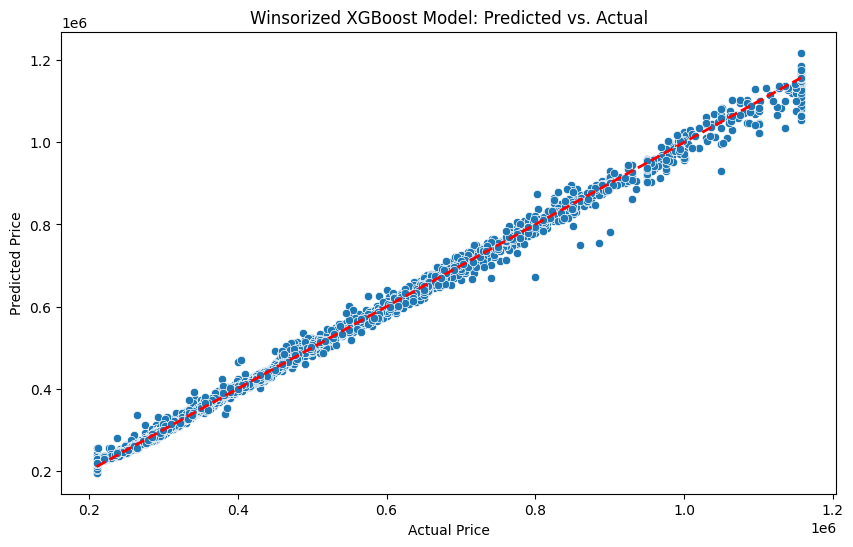

In [ ]:


# Scatter plot for XGBoost Model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb)  # Use y_pred_xgb for original XGBoost predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Add a diagonal line
plt.title('XGBoost Model: Predicted vs. Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# Scatter plot for Winsorized XGBoost Model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_w, y=y_pred_xgb_winsorized)  # Use y_pred_xgb_winsorized for winsorized XGBoost predictions
plt.plot([y_test_w.min(), y_test_w.max()], [y_test_w.min(), y_test_w.max()], 'r--', lw=2)  # Add a diagonal line
plt.title('Winsorized XGBoost Model: Predicted vs. Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()


# Model Training and Evaluation: Gradient Boosting Regressor


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=4, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print(f"📊 Gradient Boosting Model\nR² Score: {r2_gb:.4f}\nMAE: {mae_gb:.2f}\nRMSE: {rmse_gb:.2f}")


📊 Gradient Boosting Model
R² Score: 0.9949
MAE: 12570.02
RMSE: 27678.87


# Gradient Boosting Performance Comparison: Train vs. Test


In [ ]:
# Predict on train and test data
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

# Compute Train Scores
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Compute Test Scores
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"📊 **Gradient Boosting Performance Comparison**")
print(f"✅ Train R²: {r2_train:.4f}, MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}")
print(f"✅ Test  R²: {r2_test:.4f}, MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}")


📊 **Gradient Boosting Performance Comparison**
✅ Train R²: 0.9979, MAE: 10966.39, RMSE: 16697.88
✅ Test  R²: 0.9949, MAE: 12570.02, RMSE: 27678.87


# Model Training and Evaluation: Winsorized Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting model for winsorized data
gb_model_winsorized = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=4, random_state=42)

# Train the model using winsorized data
gb_model_winsorized.fit(X_train_w, y_train_w)

# Make predictions using winsorized test data
y_pred_gb_winsorized = gb_model_winsorized.predict(X_test_w)

# Evaluate the model using winsorized target
r2_gb_winsorized = r2_score(y_test_w, y_pred_gb_winsorized)
mae_gb_winsorized = mean_absolute_error(y_test_w, y_pred_gb_winsorized)
rmse_gb_winsorized = np.sqrt(mean_squared_error(y_test_w, y_pred_gb_winsorized))

print(f"📊 Winsorized Gradient Boosting Model\nR² Score: {r2_gb_winsorized:.4f}\nMAE: {mae_gb_winsorized:.2f}\nRMSE: {rmse_gb_winsorized:.2f}")

📊 Winsorized Gradient Boosting Model
R² Score: 0.9963
MAE: 10447.26
RMSE: 15607.72


# Winsorized Gradient Boosting Performance Comparison: Train vs. Test

In [ ]:
# Predict on train and test data using winsorized data
y_train_pred_w = gb_model_winsorized.predict(X_train_w)
y_test_pred_w = gb_model_winsorized.predict(X_test_w)

# Compute Train Scores using winsorized target
r2_train_w = r2_score(y_train_w, y_train_pred_w)
mae_train_w = mean_absolute_error(y_train_w, y_train_pred_w)
rmse_train_w = np.sqrt(mean_squared_error(y_train_w, y_train_pred_w))

# Compute Test Scores using winsorized target
r2_test_w = r2_score(y_test_w, y_test_pred_w)
mae_test_w = mean_absolute_error(y_test_w, y_test_pred_w)
rmse_test_w = np.sqrt(mean_squared_error(y_test_w, y_test_pred_w))

print(f"📊 **Winsorized Gradient Boosting Performance Comparison**")  # Changed title
print(f"✅ Train R²: {r2_train_w:.4f}, MAE: {mae_train_w:.2f}, RMSE: {rmse_train_w:.2f}")
print(f"✅ Test  R²: {r2_test_w:.4f}, MAE: {mae_test_w:.2f}, RMSE: {rmse_test_w:.2f}")

📊 **Winsorized Gradient Boosting Performance Comparison**
✅ Train R²: 0.9972, MAE: 9159.93, RMSE: 13143.32
✅ Test  R²: 0.9963, MAE: 10447.26, RMSE: 15607.72


# Visualizing Gradient Boosting Model Predictions: Scatter Plots

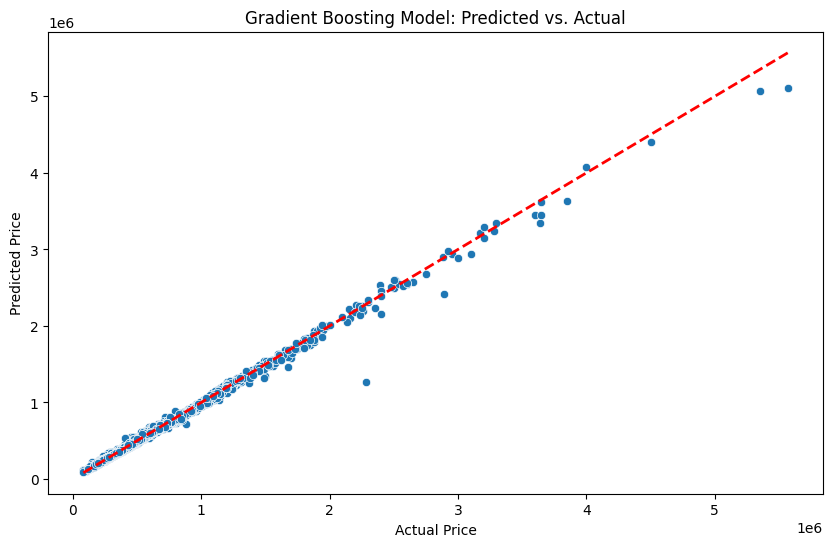

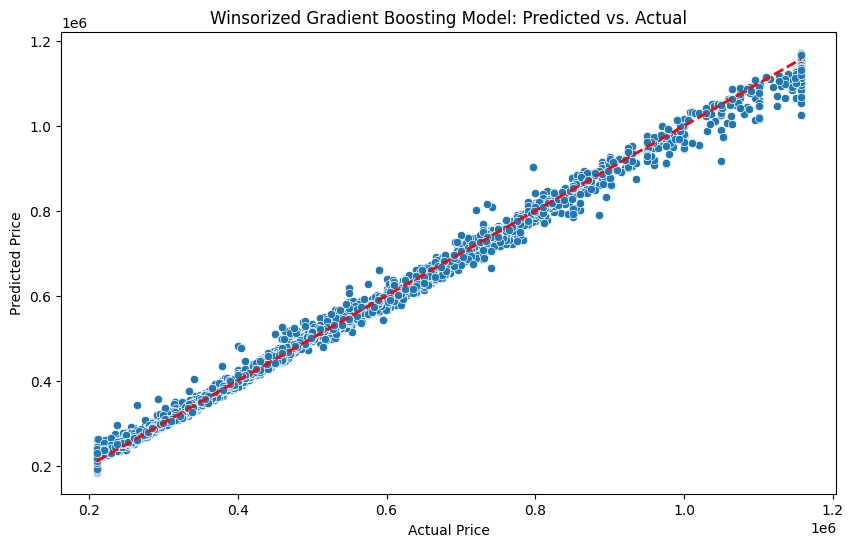

In [ ]:

# Scatter plot for Gradient Boosting Model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gb)  # Use y_pred_gb for original Gradient Boosting predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Add a diagonal line
plt.title('Gradient Boosting Model: Predicted vs. Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# Scatter plot for Winsorized Gradient Boosting Model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_w, y=y_pred_gb_winsorized)  # Use y_pred_gb_winsorized for winsorized Gradient Boosting predictions
plt.plot([y_test_w.min(), y_test_w.max()], [y_test_w.min(), y_test_w.max()], 'r--', lw=2)  # Add a diagonal line
plt.title('Winsorized Gradient Boosting Model: Predicted vs. Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()